In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


## Importing data 


In [2]:

# importing the data to train and test sets

dataset_train = np.array(np.genfromtxt(
    "hw04_data_set_train.csv", delimiter=","))
dataset_test = np.array(np.genfromtxt("hw04_data_set_test.csv", delimiter=","))

x_train_dataset = np.array(dataset_train[0:180, 0])
y_train_dataset = np.array(dataset_train[0:180, 1])
x_test_dataset = np.array(dataset_test[0:180, 0])
y_test_dataset = np.array(dataset_test[0:180, 1])
print(len(x_train_dataset))


180


## Plotting Data

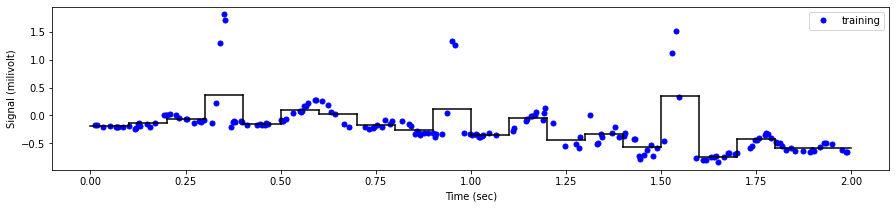

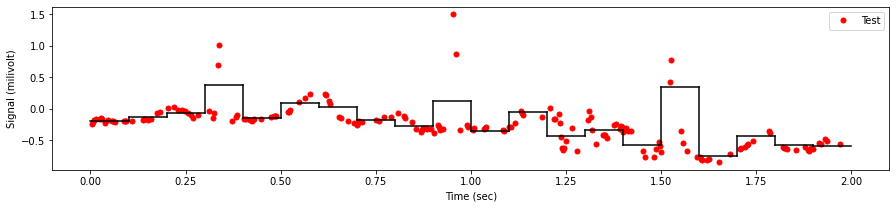

In [3]:
# bin width and origin parameters

bin_width = 0.1
origin = 0.0

max_val = max(np.max(x_train_dataset), np.max(x_test_dataset))
data_limits = np.linspace(origin, max_val, 1601)


border_l = np.arange(origin, max_val, bin_width)
border_r = np.arange(origin + bin_width, max_val + bin_width, bin_width)


plt.figure(figsize=(15, 3))
plt.plot(x_train_dataset, y_train_dataset,
         "b.", markersize=10, label="training")
reg_res_train = np.zeros(len(border_l))

for c in range(len(border_r)):
    reg_res_train[c] = np.sum((
        (border_l[c] < x_train_dataset) & (x_train_dataset <= border_r[c])) * y_train_dataset) / np.sum((border_l[c] < x_train_dataset) & (x_train_dataset <= border_r[c]))

for c in range(len(border_l)):
    plt.plot([border_l[c], border_r[c]], [
             reg_res_train[c], reg_res_train[c]], "k-")
for c in range(len(border_l) - 1):
    plt.plot([border_r[c], border_r[c]], [
             reg_res_train[c], reg_res_train[c + 1]], "k-")

plt.xlabel("Time (sec)")
plt.ylabel("Signal (milivolt)")

plt.legend(loc='upper right')


plt.figure(figsize=(15, 3))
plt.plot(x_test_dataset, y_test_dataset, "r.", markersize=10, label="Test")

for c in range(len(border_l)):
    plt.plot([border_l[c], border_r[c]], [
             reg_res_train[c], reg_res_train[c]], "k-")

for c in range(len(border_l) - 1):
    plt.plot([border_r[c], border_r[c]], [
             reg_res_train[c], reg_res_train[c + 1]], "k-")

plt.xlabel("Time (sec)")
plt.ylabel("Signal (milivolt)")

plt.legend(loc='upper right')

plt.show()


## Importing Data

In [4]:
# rmse for regressogram
rmse = 0

for i in range(len(border_l)):
    for j in range(len(y_test_dataset)):
        if(border_l[i] < x_test_dataset[j] and x_test_dataset[j] <= border_r[i]):
            rmse = rmse + (y_test_dataset[j] - reg_res_train[i])**2

result = np.sqrt(rmse / len(x_test_dataset))

print("Regressogram => RMSE is", result, " when h is", bin_width)


Regressogram => RMSE is 0.25574685884774784  when h is 0.1


## Drawing Parameters

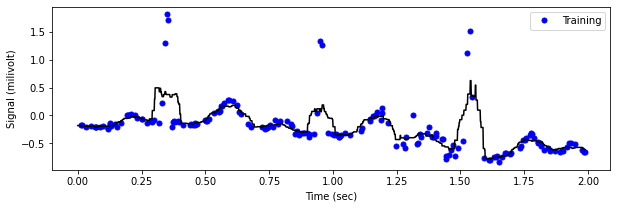

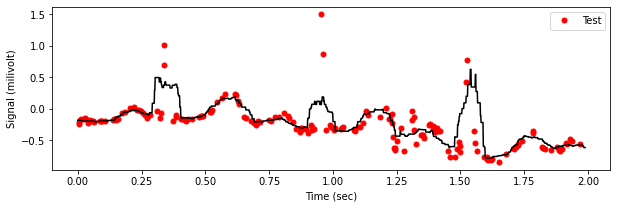

In [5]:
mean_smoother = np.asarray([np.sum(y_train_dataset[(np.abs(x-x_train_dataset)/bin_width) < 0.5])/(
    np.sum((np.abs(x-x_train_dataset)/bin_width) < 0.5)) for x in data_limits])

# Plotting running mean smoother
plt.figure(figsize=(10, 3))
plt.plot(x_train_dataset, y_train_dataset, "b.",
         markersize=10,
         label="Training")  # Plot training set
plt.plot(data_limits, mean_smoother, "k-")  # Plot mean smooter

plt.xlabel("Time (sec)")
plt.ylabel("Signal (milivolt)")
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(10, 3))
plt.plot(x_test_dataset, y_test_dataset, "r.",
         markersize=10, label="Test")  # Plot test set
plt.plot(data_limits, mean_smoother, "k-")  # Plot mean smooter

plt.xlabel("Time (sec)")
plt.ylabel("Signal (milivolt)")
plt.legend(loc='upper right')

plt.show()


In [6]:
# Calculating the running mean smoother's predictions of each x_test values
rms_predictions_mean_smoother = np.asarray([np.sum(y_train_dataset[(np.abs(x-x_train_dataset)/bin_width) < 0.5])/(
    np.sum((np.abs(x-x_train_dataset)/bin_width) < 0.5)) for x in x_test_dataset])

# Calculating the rmse of running mean smoother accordingly wtih predictions
rmse_mean_smoother = math.sqrt(
    np.sum((y_test_dataset-rms_predictions_mean_smoother)**2)/len(y_test_dataset))

print("Regressogram => RMSE is", rmse_mean_smoother, " when h is", bin_width)


Regressogram => RMSE is 0.24334170557116425  when h is 0.1


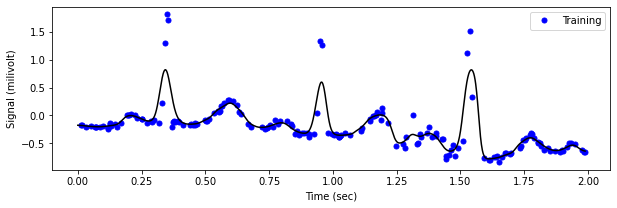

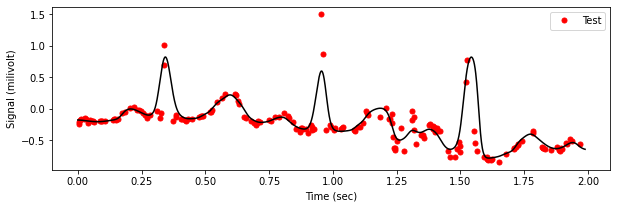

In [7]:
kernel_smoother = []
bin_width = 0.02
for i in range(len(data_limits)):
    K_u_x = (1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 *
             ((data_limits[i]-x_train_dataset)/bin_width)**2))
    g_x = np.sum(K_u_x*y_train_dataset) / np.sum(K_u_x)
    kernel_smoother.append(g_x)

# Plotting running mean smoother
plt.figure(figsize=(10, 3))
plt.plot(x_train_dataset, y_train_dataset, "b.",
         markersize=10,
         label="Training")  # Plot training set
plt.plot(data_limits, kernel_smoother, "k-")  # Plot mean smooter

plt.xlabel("Time (sec)")
plt.ylabel("Signal (milivolt)")
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(10, 3))
plt.plot(x_test_dataset, y_test_dataset, "r.",
         markersize=10, label="Test")  # Plot test set
plt.plot(data_limits, kernel_smoother, "k-")  # Plot mean smooter

plt.xlabel("Time (sec)")
plt.ylabel("Signal (milivolt)")
plt.legend(loc='upper right')

plt.show()


In [8]:
kernel_predictions = []
for i in range(len(x_test_dataset)):
    K_u_x = (1.0 / np.sqrt(2 * math.pi) *
             np.exp(-0.5 * ((x_test_dataset[i]-x_train_dataset)/bin_width)**2))
    g_x = np.sum(K_u_x*y_train_dataset) / np.sum(K_u_x)
    kernel_predictions.append(g_x)
rmse_kernel_smoother = math.sqrt(
    np.sum((y_test_dataset-kernel_predictions)**2)/len(y_test_dataset))
print("Kernel Smoother => RMSE is", rmse_kernel_smoother, " when h is", bin_width)


Kernel Smoother => RMSE is 0.19807741439132479  when h is 0.02
